# Plot QRS from RRTMG and waccm_hrates

### Imports

In [9]:
#Import usual pangeo libraries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

### Data Ingest

In [10]:
# Read in the data using xarray or some other package
ds1 = xr.open_dataset('/glade/scratch/marsh/fwsd_f09f09_baseline.002/run/fwsd_f09f09_baseline.002.cam.h1.1980-01-05-00000.nc')
ds2 = xr.open_dataset('/glade/scratch/marsh/fwsd_f09f09_test.001/run/fwsd_f09f09_test.001.cam.h1.1980-01-05-00000.nc')

### Extract heating rates

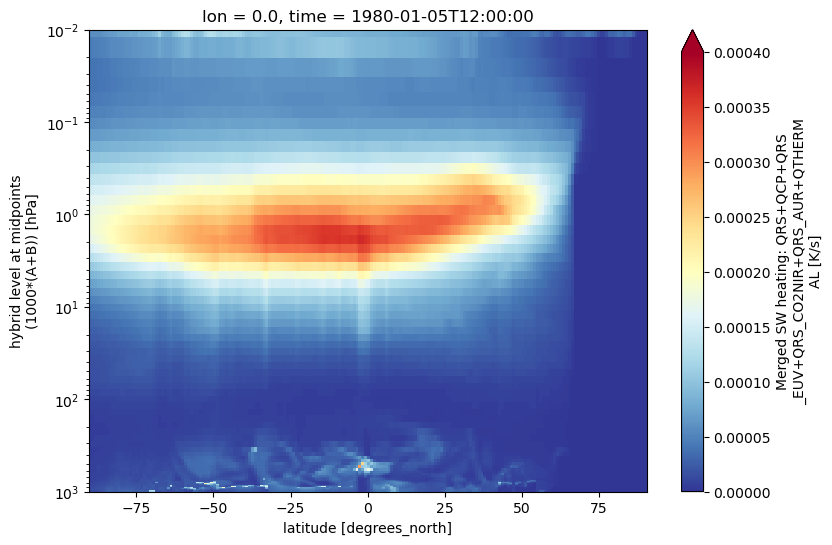

In [11]:
ds1['QRS_TOT'].isel(time=6, lon=0).plot(cmap='RdYlBu_r', figsize=(9,6), 
              ylim=(1000,1e-2), yscale='log', vmax=4e-4, 
              yincrease=False)
plt.show()

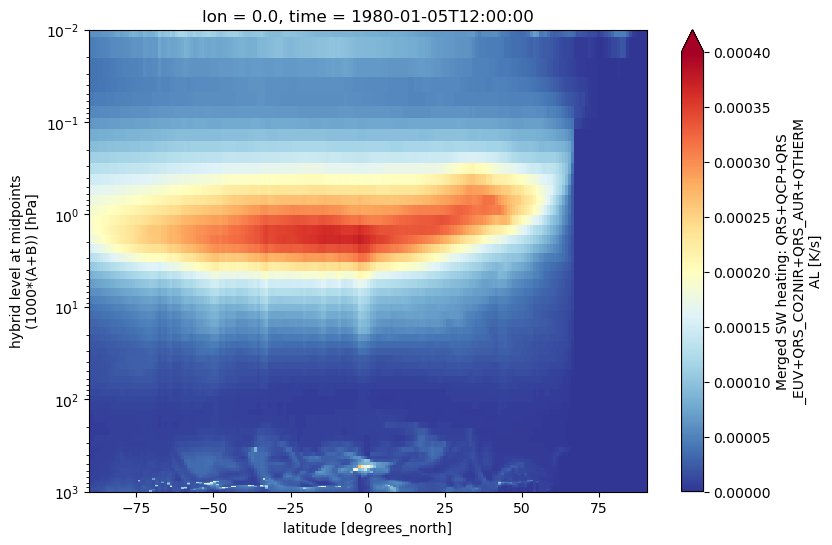

In [12]:
ds2['QRS_TOT'].isel(time=6, lon=0).plot(cmap='RdYlBu_r', figsize=(9,6), 
              ylim=(1000,1e-2), yscale='log', vmax=4e-4, 
              yincrease=False)
plt.show()

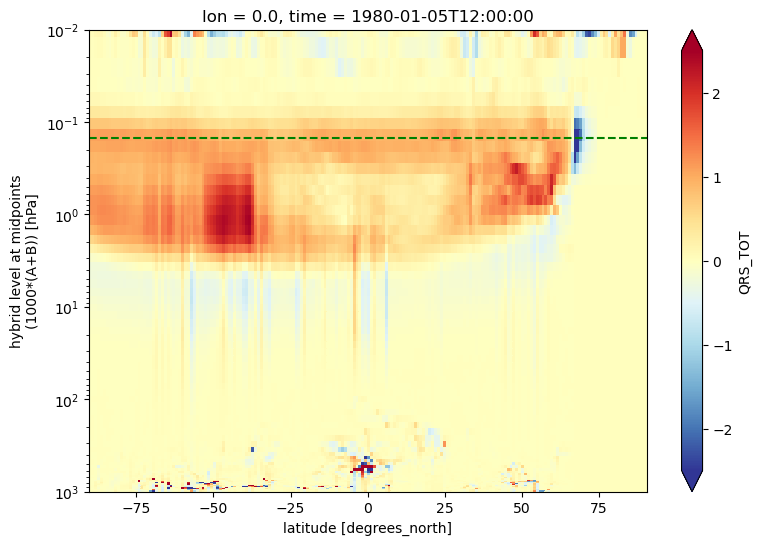

In [13]:
qdiff = (ds2['QRS_TOT']-ds1['QRS_TOT'])*(24*60*60)
qdiff.isel(time=6, lon=0).plot(cmap='RdYlBu_r', figsize=(9,6), 
              ylim=(1000,1e-2), yscale='log', vmax=2.5, 
              yincrease=False)
plt.axhline(y=15e-2, color='green', linestyle='--')
plt.show()

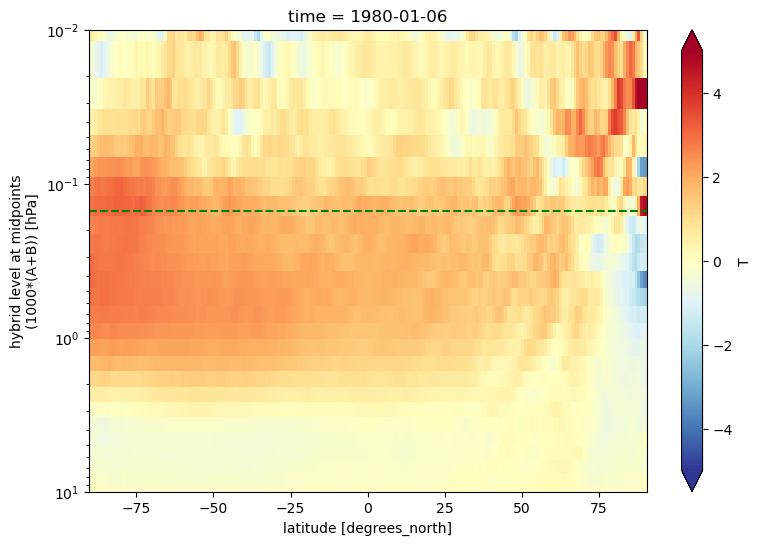

In [14]:
tdiff = ds2['T']-ds1['T']
tdiff.isel(time=12).mean(dim='lon').plot(cmap='RdYlBu_r', figsize=(9,6), 
              ylim=(10,1e-2), yscale='log', vmax=5, 
              yincrease=False)
plt.axhline(y=15e-2, color='green', linestyle='--')

plt.show()

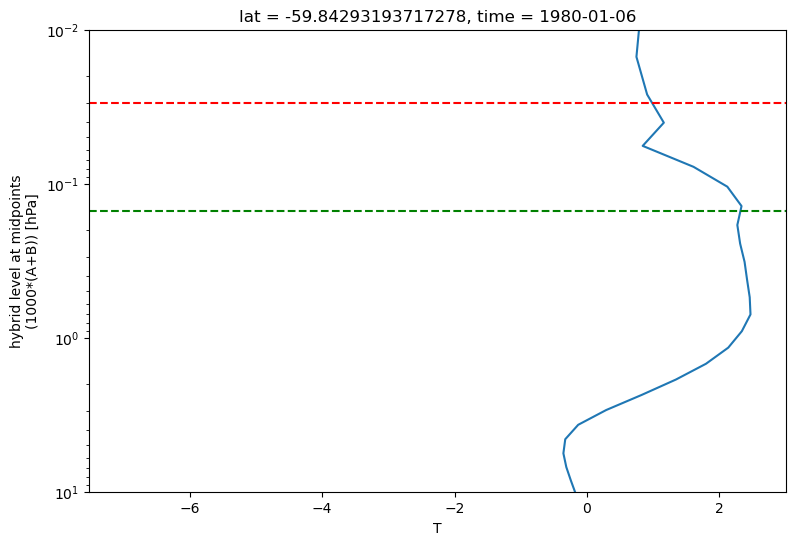

In [19]:
tdiff.isel(time=12).sel(lat=-60, method='nearest').mean(dim='lon').plot(figsize=(9,6), 
              ylim=(10,1e-2), yscale='log', y="lev",
              yincrease=False)
plt.axhline(y=15e-2, color='green', linestyle='--')
plt.axhline(y=3e-2, color='red', linestyle='--')

plt.show()

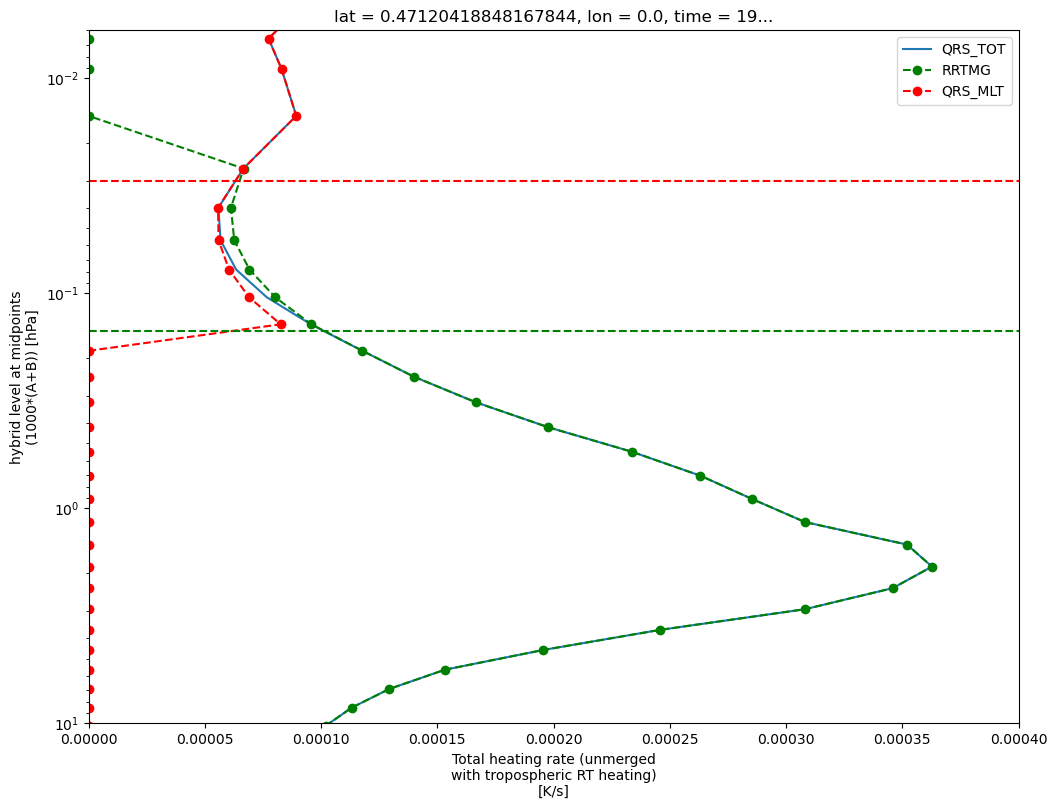

In [15]:
ds2['QRS_TOT'].isel(time=6, lat=96, lon=0).plot(figsize=(12,9),
              xlim=(0,4e-4),
              ylim=(10,6e-3), yscale='log', y="lev",
              yincrease=False, label='QRS_TOT')

ds2['QRS'].isel(time=6, lat=96, lon=0).plot(label='RRTMG', y='lev', linestyle='--', marker='o', color='green')
ds2['QRS_MLT'].isel(time=6, lat=96, lon=0).plot(label='QRS_MLT', y='lev', linestyle='--', marker='o', color='red')

plt.axhline(y=3e-2, color='red', linestyle='--')
plt.axhline(y=15e-2, color='green', linestyle='--')

plt.legend()

plt.show()

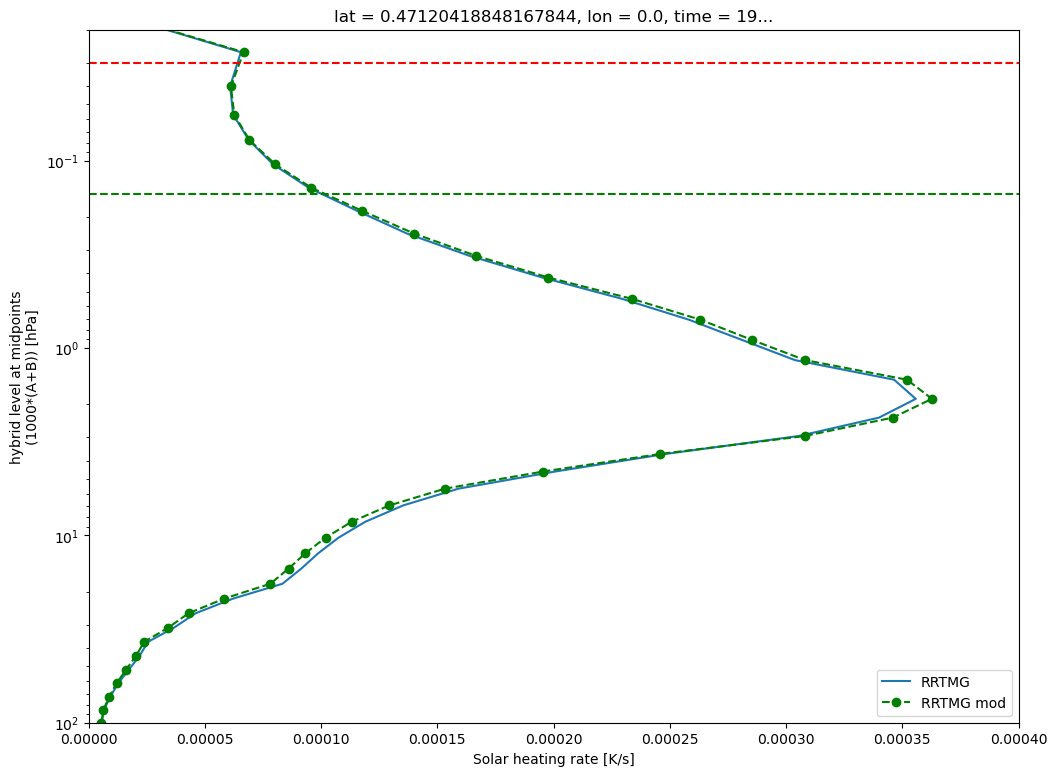

In [16]:
ds1['QRS'].isel(time=6, lat=96, lon=0).plot(figsize=(12,9),
              xlim=(0,4e-4),
              ylim=(100,2e-2), yscale='log', y="lev",
              yincrease=False, label='RRTMG')

ds2['QRS'].isel(time=6, lat=96, lon=0).plot(label='RRTMG mod', y='lev', linestyle='--', marker='o', color='green')

plt.axhline(y=3e-2, color='red', linestyle='--')
plt.axhline(y=15e-2, color='green', linestyle='--')

plt.legend()

plt.show()